# Problem Set 3, due May 9th at 3:30pm.

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python!

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
%matplotlib inline
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()
print bdata.data.shape
y = bdata.target
print y.shape

(506L, 13L)
(506L,)


The following commands will provide some basic information about the shape of the data:

In [3]:
print bdata.keys()


['data', 'feature_names', 'DESCR', 'target']


In [4]:
bd_df = pd.DataFrame(bdata.data, columns = bdata.feature_names)
bd_df1 = bd_df
bd_df1['MEDV'] = bdata.target

In [5]:
bd_df1.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


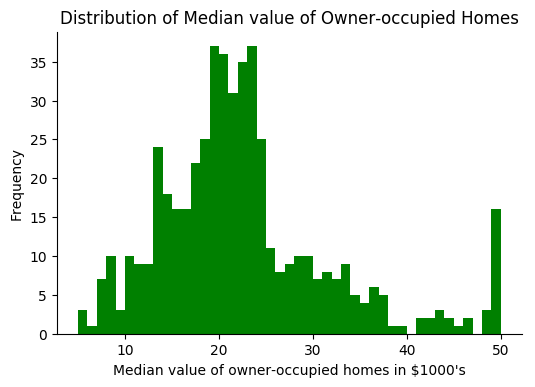

In [6]:
from matplotlib import *
import sys
from pylab import *

fig,a = plt.subplots()
a.hist(bdata.target, facecolor='green', bins =45)
a.set_xlabel("Median value of owner-occupied homes in $1000's")
a.set_ylabel("Frequency")
plt.title('Distribution of Median value of Owner-occupied Homes')

# Hide the right and top spines
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)

plt.show()

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


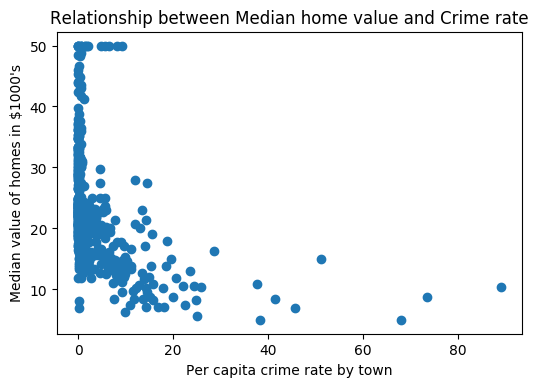

In [7]:
plt.scatter(bd_df['CRIM'], bdata.target)
plt.xlabel("Per capita crime rate by town")
plt.ylabel("Median value of homes in $1000's")
plt.title('Relationship between Median home value and Crime rate')

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

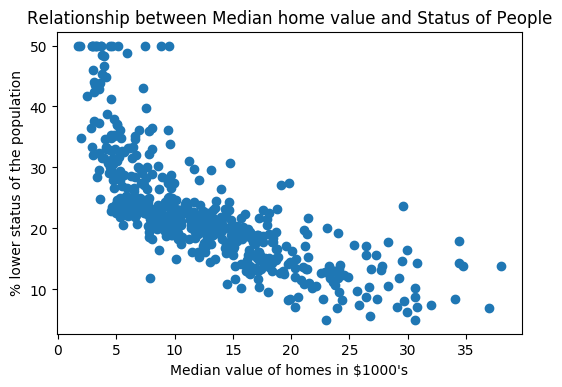

In [8]:
plt.scatter(bd_df['LSTAT'], bdata.target)
plt.xlabel("Median value of homes in $1000's")
plt.ylabel("% lower status of the population") 
plt.title('Relationship between Median home value and Status of People')

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [9]:
# Function to calculate root mean squared error (RMSE)

def compute_rmse(prediction, target):
    prediction = np.array(prediction)
    target = np.array(target)
    return np.sqrt(np.mean((prediction-target)**2))

#Example

prediction = np.array([2,2,3])
target = np.array([0,2,6])
compute_rmse(prediction,target)

2.0816659994661326

### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [10]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class

np.random.seed(seed=13579)

bdata_train = bd_df1.sample(frac = 0.66, random_state = 13579) # Frac keyword argument specifies the fraction of rows to return in the random sample frac=1 means return all rows in random order 
bdata_test = bd_df1.drop(bdata_train.index)
bdata_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,3.508231,11.791916,10.980599,0.050898,0.549107,6.239428,67.150299,3.907874,9.155689,404.751497,18.463174,353.808862,12.888862,22.045808
std,7.996200,23.637419,6.826226,0.220120,0.114523,0.707043,28.889297,2.162850,8.522696,165.600666,2.147068,95.818304,7.270466,8.587299
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082492,0.000000,5.190000,0.000000,0.448000,5.854500,42.250000,2.114675,4.000000,279.000000,17.400000,374.462500,7.182500,16.850000
50%,0.234405,0.000000,9.125000,0.000000,0.524000,6.170500,73.900000,3.376500,5.000000,330.000000,19.000000,391.190000,11.645000,21.200000
75%,2.709347,19.500000,18.100000,0.000000,0.624000,6.615750,93.800000,5.372350,8.000000,666.000000,20.200000,395.735000,17.157500,24.800000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [15]:
#Mean of MEDV in Training Data
mean_train_MEDV = bdata_train['MEDV'].mean()
# Creating the Predicted MEDV values, which is the same as the mean MEDV of Training data for the length of the Training array
train_prediction = np.repeat(mean_train_MEDV,len(bdata_train))
# Calculating the RMSE of training data predictions
rmse_train = compute_rmse(train_prediction, bdata_train['MEDV'])
print('The RMSE value for training data set:',rmse_train)

('The RMSE value for training data set:', 8.5744344154073122)


In [18]:
# Calculating the RMSE of test data (use the predictions from the training data and test it against MEDV in test dataset)
rmse_test = compute_rmse(mean_train_MEDV[:len(bdata_test)], bdata_test['MEDV'])
print('The RMSE value for test data set:',rmse_test)

TypeError: 'float' object has no attribute '__getitem__'

The RMSE of test dataset is higher than the RMSE of the training data set. It is expected for any model being tested on a test data to have a RMSE greater than the training RMSE as the model is seeing the test data for the first time. The model fitness will be assessed by the RMSE of test data set, it should be minimal or as close to training RMSE to be considered a good model. Mean model of prediction is not an effective model. 


##Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [19]:
# Function
# x1, x2 : array , Array of numerical values corresponding to predictions for each of the N observations
# L=1: Manhatten distance
# L=2: Euclidean distance
def distance(x1,x2,L):   
    if L == 1: 
       return abs(np.sum(x1-x2))
    if L == 2:
       return np.sqrt(np.sum((x1-x2)**2))

#Example
print "The distance between ((3,4),(5,9),1) is " 
x1 = np.array([3,4])
x2 = np.array([5,9])
L = 1
distance(x1,x2,L)


The distance between ((3,4),(5,9),1) is 


7

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


In [20]:
import timeit
train_matrix = bdata_train.as_matrix(('CRIM','RM','MEDV'))
test_matrix = bdata_test.as_matrix(('CRIM','RM','MEDV'))
#loop to get the distance
#top_k_nearest = dist[:k]
#index = [top_k_nearest[j][0] for j in range(k)]
def NN(test_matrix, train_matrix,L):
    row_num, col_num = train_matrix.shape
    pred = []
    for i in range (len(test_matrix)):
            dist = []
            for j in range(len(train_matrix)):
                    dist.append((j,distance(test_matrix[i], train_matrix[j,:col_num-1], L)))
            dist = sorted(dist,key=lambda x:x[1])
            index=dist[0][0]
            pred.append(train_matrix[index,col_num-1])
    return pred

pred = NN(test_matrix[:,:2],train_matrix[:,:],2)
start_time = timeit.default_timer()
RMSE = compute_rmse(pred,bdata_test['MEDV'])
Total_run_time = timeit.default_timer()-start_time
print RMSE
print Total_run_time 


7.40172041598
0.000673525364324


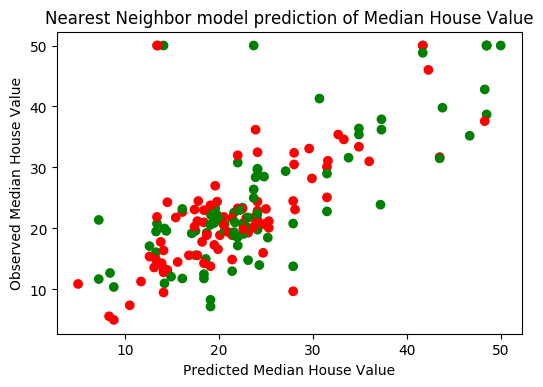

In [21]:
import matplotlib.pyplot
matplotlib.pyplot.scatter([pred],[bdata_test['MEDV']],color=['red','green'])
plt.xlabel('Predicted Median House Value')
plt.ylabel('Observed Median House Value')
plt.title('Nearest Neighbor model prediction of Median House Value')
plt.show()

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [22]:
def norm(x):
    row_num, col_num =  x.shape
    for i in range(col_num - 1):
        mean = np.mean(x[:,i])
        std = np.std(x[:,i])
        x[:,i] = (x[:,i]-mean)/std
    return x

In [23]:
norm_train_matrix = bdata_train.as_matrix(columns=('CRIM','RM','MEDV'))
norm_test_matrix = bdata_test.as_matrix(columns=('CRIM','RM','MEDV'))
norm_train_data = norm(norm_train_matrix)
norm_test_data = norm(norm_test_matrix)

In [24]:
# use nearest neighbor and RMSE function
norm_pred = NN(norm_test_data[:,:2],norm_train_data[:,:],2)
compute_rmse(norm_pred,norm_test_data[:,2])

7.6927555773008294

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [25]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''
#With 4 variables
new_test_matrix = bdata_test.as_matrix(columns=('CRIM','NOX','RM','DIS','MEDV'))
new_train_matrix = bdata_train.as_matrix(columns=('CRIM','NOX','RM','DIS','MEDV'))
new_norm_test_matrix = norm(new_test_matrix)
new_norm_train_matrix = norm(new_train_matrix)
pred1 = NN(new_norm_test_matrix[:,:4],new_norm_train_matrix[:,:],2)
start_time1 = timeit.default_timer()
RMSE_new = compute_rmse(pred1,new_test_matrix[:,4])
run_time_new = timeit.default_timer() - start_time1
print RMSE_new
print run_time_new




7.90036428362
0.000786421044438


In [26]:
#With 4 variables and using manhatten distance
new_test_matrix = bdata_test.as_matrix(columns=('CRIM','NOX','RM','DIS','MEDV'))
new_train_matrix = bdata_train.as_matrix(columns=('CRIM','NOX','RM','DIS','MEDV'))
new_norm_test_matrix = norm(new_test_matrix)
new_norm_train_matrix = norm(new_train_matrix)
pred1 = NN(new_norm_test_matrix[:,:4],new_norm_train_matrix[:,:],1)
start_time1 = timeit.default_timer()
RMSE_new1 = compute_rmse(pred1,new_test_matrix[:,4])
run_time_new1 = timeit.default_timer() - start_time1
print RMSE_new1
print run_time_new1

12.8964953776
0.000470398667147


In [27]:
#With 2 variables and using manhatten distance
new_test_matrix = bdata_test.as_matrix(columns=('CRIM','MEDV'))
new_train_matrix = bdata_train.as_matrix(columns=('CRIM','MEDV'))
new_norm_test_matrix = norm(new_test_matrix)
new_norm_train_matrix = norm(new_train_matrix)
pred1 = NN(new_norm_test_matrix[:,:1],new_norm_train_matrix[:,:],1)
start_time1 = timeit.default_timer()
RMSE_new1 = compute_rmse(pred1,new_test_matrix[:,1])
run_time_new1 = timeit.default_timer() - start_time1
print RMSE_new1
print run_time_new1




13.476562342
0.00035279900036


The combination of the 4 variables 'CRIM','NOX','RM','DIS','MEDV' and Euclidean distance choice has the lowest RMSE 7.90036428362. Yes my decisions affect the running time of the algorithm but only slightly.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [32]:
def k_cross_validation(data,features,fold,k,choice):
    
#Set the features
features = features + ['MEDV']
t_data = bdata_df[features]
len_features = len(features)
    
#Initialize the index variables
t_index = list(t_data.index)

   
np.random.shuffle(t_index)
rem = []
partition = int(len(t_index)/fold)
remainder = []
rmse_list = []
    
#Setting the indexes for the K fold cross validation
for i in range(1,fold+1):
        test = t_index[(i-1)*partition:i*partition]
        test_data = norm(t_data.iloc[test].as_matrix())
        remainder = remainder + test
        rem = set(remainder) ^ set(test)
        train = list(rem) + t_index[i*partition:]
        train_data = norm(t_data.iloc[train].as_matrix())
print('Iteration number:',i,'Test index start:', (i-1)*partition)
        
#Call the nearest neighbor function
if k == 1:
    pred3 = NN(test_data[:,:len_features-1],train_data[:,:],choice)
else:
    pred3 = k_nearest_neighbor(test_data[:,:len_features-1],train_data[:,:],k,choice)
    
rmse_value = compute_rmse(pred3,test_data[:,len_features-1])
rmse_list.append(rmse_value)
        
average = np.mean(rmse_list)    
    
print rmse_list
print average

IndentationError: expected an indented block (<ipython-input-32-fe0613f20142>, line 4)

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [38]:
def k_nearest_neighbor(test_matrix,train_matrix,k,choice):
    row_num,col_num = train_matrix.shape
pred = []
for i in range(len(test_matrix)):
    dist=[]
for j in range(len(train_matrix)):
    dist.append((j,distance(test_matrix[i],train_matrix[j,:col_num-1],choice)))
    dist = sorted(dist, key=lambda x: x[1])
    top_k_nearest = dist[:k]
    index = [top_k_nearest[j][0] for j in range(k)]
pred_a = train_matrix[index,col_num-1]    
return np.mean(pred_a)
rmse_list_values = k_cross_validation(t_data,['CRIM','RM'],10,3,2)

NameError: name 'col_num' is not defined

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [39]:
'''
CRIM - 0
ZN - 1
RM - 5
AGE - 6
DIS - 7
TAX - 9
'''
rmse_array_307 = []
for i in range(1,26):
    print(i,"Nearest Neighbor")
    new_rmse = k_cross_validation(t_data,['CRIM','RM','ZN','AGE','DIS','TAX'],10,i,2)
    print("NEW RMSE",new_rmse)
    rmse_array_307.append(new_rmse)


(1, 'Nearest Neighbor')


NameError: name 'k_cross_validation' is not defined

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*